# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


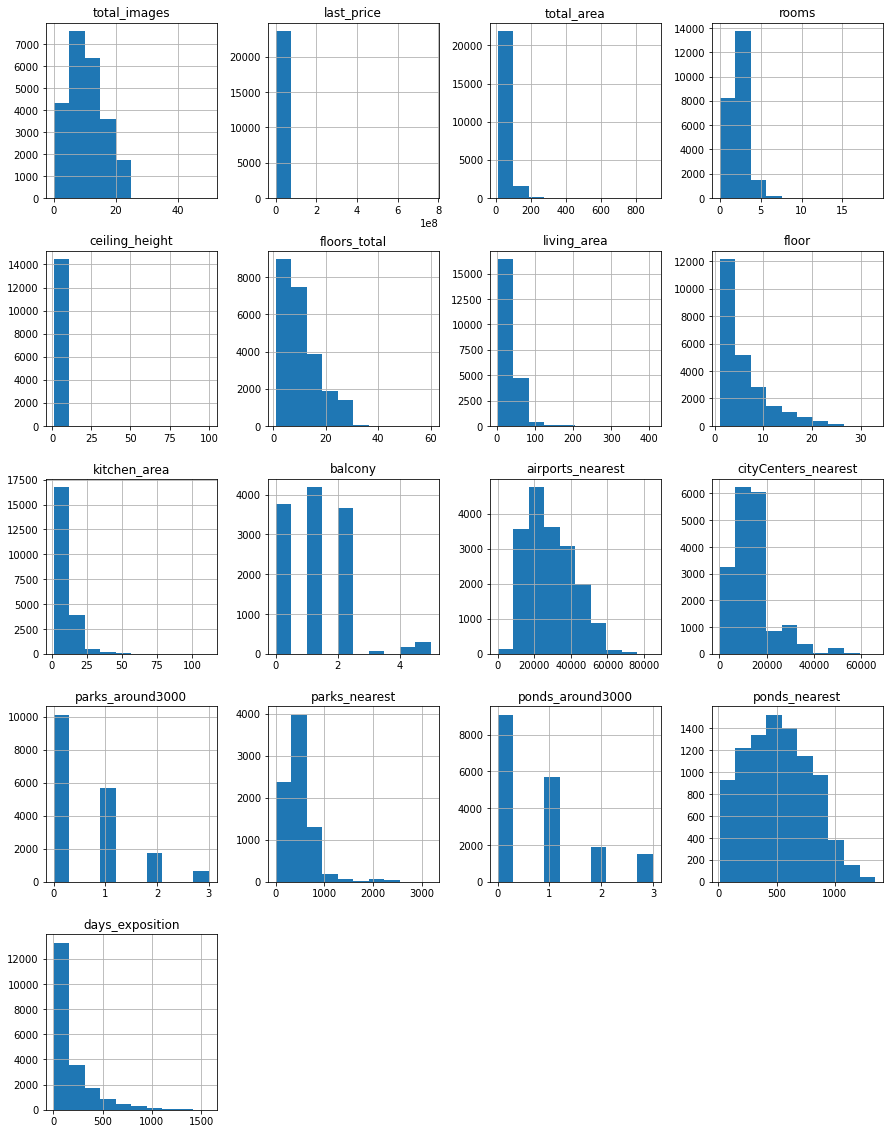

In [7]:
data.hist(figsize=(15, 20));

Где:

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
    balcony — число балконов  
    ceiling_height — высота потолков (м)  
    cityCenters_nearest — расстояние до центра города (м)  
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
    first_day_exposition — дата публикации  
    floor — этаж  
    floors_total — всего этажей в доме  
    is_apartment — апартаменты (булев тип)  
    kitchen_area — площадь кухни в квадратных метрах (м²)  
    last_price — цена на момент снятия с публикации  
    living_area — жилая площадь в квадратных метрах (м²)  
    locality_name — название населённого пункта  
    open_plan — свободная планировка (булев тип)    
    parks_around3000 — число парков в радиусе 3 км  
    parks_nearest — расстояние до ближайшего парка (м)  
    ponds_around3000 — число водоёмов в радиусе 3 км  
    ponds_nearest — расстояние до ближайшего водоёма (м)  
    rooms — число комнат  
    studio — квартира-студия (булев тип)  
    total_area — общая площадь квартиры в квадратных метрах (м²)  
    total_images — число фотографий квартиры в объявлении  

### Предобработка данных

#### Обработка пропусков и аномальных значений

In [8]:
# Где есть пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
# Где есть выбросы
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**ceiling_height : используется в исследовании**

In [10]:
# почти в 50% записей не указана высота потолков, заполнить нечем
# помимо этого, часть указанных данных неадекватна (>10м)
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [11]:
# разделю все ceiling_height > 10 на 10, т.к. это, скорее всего, ошибка
data.loc[data['ceiling_height'] > 15, 'ceiling_height'] = \
data.loc[data['ceiling_height'] > 15, 'ceiling_height'] / 10

data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [12]:
# одну строку со значением в 100м удалю
data = data.query('ceiling_height != 10')

**floors_total : используется в исследовании**

In [13]:
# пропущенные значения заполнить нельзя
# строк мало (86), исключаю их из исследования
data = data.dropna(subset=['floors_total'])
# есть этажи более 30ти, это может быть не ошибка, если квартира на этаже ниже максимального
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [14]:
# большие этажи это не ошибка
# если в будущем это не помешает проводить исследование, пока строки оставляю
data.query('floors_total > 30 & floor > floors_total').shape[0]

0

**living_area и kitchen_area : используется в исследовании  (красный) 
столбцы, относящиеся к площади квартиры:
kitchen_area, living_area и total_area (в total_area пропусков нет)**

In [15]:
# Посчитаю зависимость living от total в известных данных
data_living_ratio = (data.query('~living_area.isna() & ~total_area.isna()')['living_area'] / \
                     data.query('~living_area.isna() & ~total_area.isna()')['total_area']).median()
data_living_ratio

0.568210015790661

In [16]:
# Заполняю пропуски в living_area значениями total_area * data_living_ratio
data['living_area'] = data['living_area'].fillna(data['total_area'] * data_living_ratio)

Анлогично поступаю с 'kitchen_area'

In [17]:
data_kitchen_ratio = (data.query('~kitchen_area.isna() & ~total_area.isna()')['kitchen_area'] / \
                     data.query('~kitchen_area.isna() & ~total_area.isna()')['total_area']).median()
data_kitchen_ratio

0.1723404255319149

In [18]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * data_kitchen_ratio)

In [19]:
# есть отрицательное значение в living_area
data.sort_values(by='living_area', ascending=True).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21758,0,2330000.0,23.0,2018-01-01T00:00:00,0,NaN,24.0,2.00000,22,NaN,...,3.963830,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.0,6.0,2.00000,2,NaN,...,9.000000,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,NaN,17.0,3.00000,17,NaN,...,11.000000,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
23574,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.0,8.0,3.00000,8,NaN,...,16.000000,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
17582,11,2680000.0,22.0,2018-08-11T00:00:00,0,NaN,25.0,5.00000,8,NaN,...,3.791489,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21943,15,6100000.0,77.6,2019-02-28T00:00:00,4,2.5,9.0,5.40000,1,NaN,...,9.800000,NaN,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
16431,13,3799000.0,31.0,2018-04-12T00:00:00,1,2.6,5.0,6.00000,1,NaN,...,17.000000,NaN,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0
19251,19,4050000.0,33.0,2018-10-15T00:00:00,1,2.5,22.0,6.50000,21,NaN,...,18.000000,NaN,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0
17961,3,1400000.0,13.0,2017-12-03T00:00:00,1,2.6,9.0,7.38673,1,NaN,...,2.240426,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19546,3,1850000.0,13.0,2019-03-11T00:00:00,1,3.4,5.0,7.38673,2,False,...,2.240426,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0


In [20]:
# исправляю отрицательные
data['living_area'] = data['living_area'].abs()

In [21]:
# посмотрю, сколько в living и kitchen аномально больших и маленьких площадей
data.query('living_area > 150').shape[0]

134

In [22]:
# Их очень мало, сильно отличаются от обычных, уберу как выбросы
data.query('living_area < 10').shape[0]

31

In [23]:
data = data.query('living_area > 10 & living_area < 150 | living_area.isna()')

**is_apartment : не используется в исследовании  
пропущенные значения заполнить сложно, так как я не знаю, коммерческая ли недвижимость;**

**balkony : в исследовании используется  
пропуски заполняю нулём, так как они, скорее всего, означают отсутствие балкона**

In [24]:
# balcony : используется в исследовании
# если не указано, скорее всего балкона нет, можно заполнить пропуски
# половин балкона нет
data['balcony'] = data['balcony'].fillna('0.0')
data['balcony'].unique()

array(['0.0', 2.0, 0.0, 1.0, 5.0, 4.0, 3.0], dtype=object)

**locality_name : используется в исследовании  
заполнить не указанный населённый пункт нельзя**

In [25]:
# строк мало (48), исключаю их из исследования
data = data.dropna(subset=['locality_name'])

**airports_nearest : не используется в исследовании**

**cityCenters_nearest : используется в исследовании**

In [26]:
# Посмотрю у скольких пустых cityCenters указан locality_name
data.query('cityCenters_nearest.isna() & ~locality_name.isna()').shape[0]

5487

In [27]:
# если указан населённый пункт (не сам город СПб), то можно заполнить
# cityCenters cредним значением для этого населённого пункта
# остальные оставлю как есть
for city in data['locality_name'].unique():
    data.loc[(data['locality_name'] == city) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == city), 'cityCenters_nearest'].median()      

**parks_around3000 | parks_nearest : parks_nearest используется в исследовании**

In [28]:
# пропуски в parks_around3000 совпадают с пропусками в parks_nearest, по ним нет информации
# т.е. в строках, где parks_around3000 null парков, скорее всего, рядом нет
# такие строки заполню "0"
data.query('parks_around3000.isna() & ~parks_nearest.isna()').shape[0]

0

In [29]:
# во всех пропущенных parks_nearest в районе 3000м парков нет (0)
data.query('parks_around3000 == 0 & parks_nearest.isna()').shape[0]

9972

In [30]:
# заполню пропуски в parks_around3000 "нет"
data['parks_around3000'] = data['parks_around3000'].fillna(0)
# если в parks_around3000 парков нет, то и в cоответствующих nearest тоже напишу 0
data.loc[(data['parks_around3000'] == 0) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
data.loc[(data['parks_around3000'] == 0) & (data['parks_nearest'].isna()), 'parks_nearest'].fillna(0)

**ponds_around3000 | ponds_nearest : в исследовании не используются, не трогаю**

**days_exposition : в исследовании используются**

In [31]:
# Пропущенные квартиры не являются только что выставленными - некоторые их них за 2014 год
# Заполнить пропуски нечем
data.query('days_exposition.isna()').sort_values(by='first_day_exposition').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3291,8,8200000.0,52.5,2014-11-27T00:00:00,1,NaN,8.0,21.5,2,NaN,...,15.1,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
15857,6,25000000.0,145.2,2014-11-27T00:00:00,3,NaN,5.0,60.7,5,NaN,...,40.2,0.0,Санкт-Петербург,36779.0,14931.0,0.0,0.0,0.0,NaN,NaN
3873,7,20100000.0,117.6,2014-11-27T00:00:00,3,NaN,8.0,62.5,7,NaN,...,21.5,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
6922,17,29999000.0,133.5,2014-12-08T00:00:00,3,3.0,15.0,71.7,12,NaN,...,19.8,2.0,Санкт-Петербург,31656.0,8733.0,1.0,562.0,1.0,522.0,NaN
11055,3,8200000.0,47.1,2014-12-09T00:00:00,1,3.0,8.0,19.0,8,False,...,11.9,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN


In [32]:
# Проверка заполненных пропусков
# Удалось заполнить небольшую часть
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9014
floors_total                0
living_area                 0
floor                       0
is_apartment            20622
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5507
cityCenters_nearest      5420
parks_around3000            0
parks_nearest               0
ponds_around3000         5486
ponds_nearest           14462
days_exposition          3131
dtype: int64

#### Типы данных

**Неверные типы данных в first_day_exposition (datetime, для заданий в дальнейшем), is_apartment(bool, или да или нет), balcony (int, нельзя иметь пол балкона)**

In [33]:
data['balcony'] = pd.to_numeric(data['balcony'])
data['balcony'] = data['balcony'].astype('int')

data['is_apartment'] = data['is_apartment'].astype('bool')

data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23365 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23365 non-null  int64         
 1   last_price            23365 non-null  float64       
 2   total_area            23365 non-null  float64       
 3   first_day_exposition  23365 non-null  datetime64[ns]
 4   rooms                 23365 non-null  int64         
 5   ceiling_height        14351 non-null  float64       
 6   floors_total          23365 non-null  float64       
 7   living_area           23365 non-null  float64       
 8   floor                 23365 non-null  int64         
 9   is_apartment          23365 non-null  bool          
 10  studio                23365 non-null  bool          
 11  open_plan             23365 non-null  bool          
 12  kitchen_area          23365 non-null  float64       
 13  balcony         

####  Обработка дубликатов

In [35]:
# Неявные дубликаты могут быть в столбце locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [36]:
data['locality_name'].nunique()

364

In [37]:
def drop_locality(place):
    if 'поселок' in place:
        if 'городского типа' in place:
            return place.replace('поселок городского типа ', '')
        return place.replace('поселок ', '')
    if 'посёлок' in place:
        if 'городского типа' in place:
            return place.replace('посёлок городского типа ', '')
        return place.replace('посёлок ', '')
    elif 'деревня' in place:
        return place.replace('деревня ', '')
    elif 'село' in place:
        return place.replace('село ', '')
    elif 'городской' in place:
        return place.replace('городской ', '')
    elif 'садовое товарищество' in place:
        return place.replace('садовое товарищество ', '')
    elif 'коттеджный' in place:
        return place.replace('коттеджный ', '')
    elif 'при железнодорожной станции' in place:
        return place.replace('при железнодорожной станции ', '')
    elif 'садоводческое некоммерческое товарищество' in place:
        return place.replace('садоводческое некоммерческое товарищество ', '')
    elif 'ё' in place:
        return place.replace('ё', 'е')    
    return place

In [38]:
data['locality_name_drop'] = data['locality_name'].apply(drop_locality)
data['locality_name_drop'] = data['locality_name_drop'].apply(drop_locality)
data['locality_name_drop'].nunique()
# Удалось удалить 55 неявных дубликатов

309

#### Обработка редких и выбивающихся значений

**Вместе с обработкой пропусков**  
- значения ceiling, большие 15, были разделены на 2  
- в Living (kitchen и total заодно) убраны экстремально большие квартиры  
- этажи оставлены пока без изменений  

### Посчитайте и добавьте в таблицу новые столбцы

In [39]:
# Цена одного квадратного метра 
data['meter_price'] = data['last_price'] / data['total_area']

In [40]:
# День недели публикации
data['week_day'] = data['first_day_exposition'].dt.weekday

In [41]:
# Месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

In [42]:
# Год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [43]:
# Тип этажа квартиры (значения — «первый», «последний», «другой»)
def categorize_floor(floor, total_floors):
    if floor == 1:
        return 'первый'
    elif floor == total_floors:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(lambda x: categorize_floor(x.floor, x.floors_total), axis=1)

In [44]:
# Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений) cityCenters_nearest
data['city_kilo'] = (data['cityCenters_nearest'] / 1000).round(0)

In [45]:
# Новые столбцы
my_columns = ['meter_price', 'week_day', 'month', 'year', 'floor_type', 'city_kilo']
data[my_columns].head(5)

,meter_price,week_day,month,year,floor_type,city_kilo
0,120370.370370,3,3,2019,другой,16.0
1,82920.792079,1,12,2018,первый,19.0
2,92785.714286,3,8,2015,другой,14.0
3,408176.100629,4,7,2015,другой,7.0
4,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

#### Изучить параметры объектов

**Количество объявлений : характеристики самого помещения**

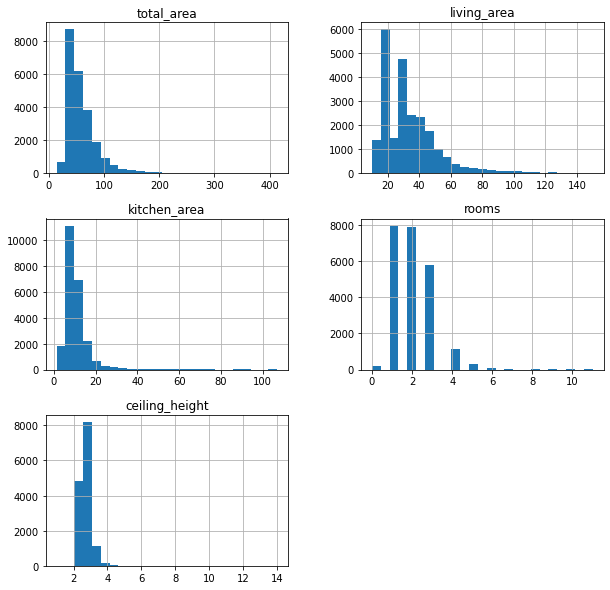

In [46]:
characteristics_column = [
    'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height'
]
data[characteristics_column].hist(figsize=(10, 10), bins=25);

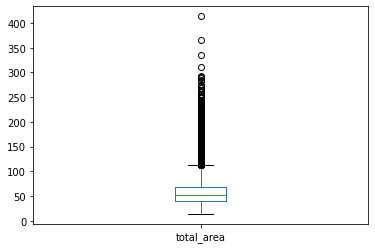

In [47]:
data['total_area'].plot(kind='box');

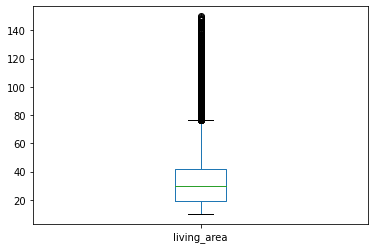

In [48]:
data['living_area'].plot(kind='box');

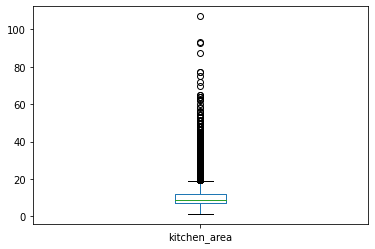

In [49]:
data['kitchen_area'].plot(kind='box');

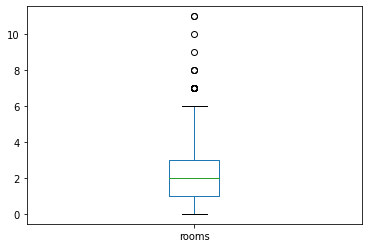

In [50]:
data['rooms'].plot(kind='box');

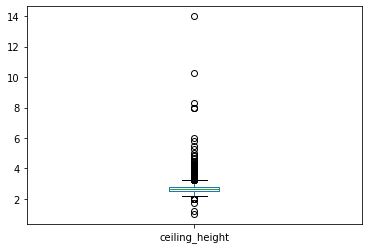

In [51]:
data['ceiling_height'].plot(kind='box');

In [52]:
data[characteristics_column].describe()

,total_area,living_area,kitchen_area,rooms,ceiling_height
count,23365.000000,23365.000000,23365.000000,23365.000000,14351.000000
mean,58.899455,33.684632,10.336116,2.048235,2.723894
std,28.756163,18.098052,5.530021,1.013491,0.305765
min,14.000000,10.080000,1.300000,0.000000,1.000000
25%,40.000000,19.000000,7.000000,1.000000,2.500000
50%,52.000000,30.000000,9.000000,2.000000,2.650000
75%,69.000000,42.000000,11.900000,3.000000,2.800000
max,413.500000,149.893802,107.000000,11.000000,14.000000


- Бо́льшая часть продаж это помещения общиего размера до 100 м² (размеры kitchen, ceiling_height и living связаны с общим);
- Есть помещения большей площади, но количество продаж у них меньше;
- Помещения больше 100 м² можно считать большими, а меньше 40 м² - очень маленькими;
- В основном помещения однокомнатные и двухкомнатные.

---

**Количество объявлений : расположение/характеристики здания**

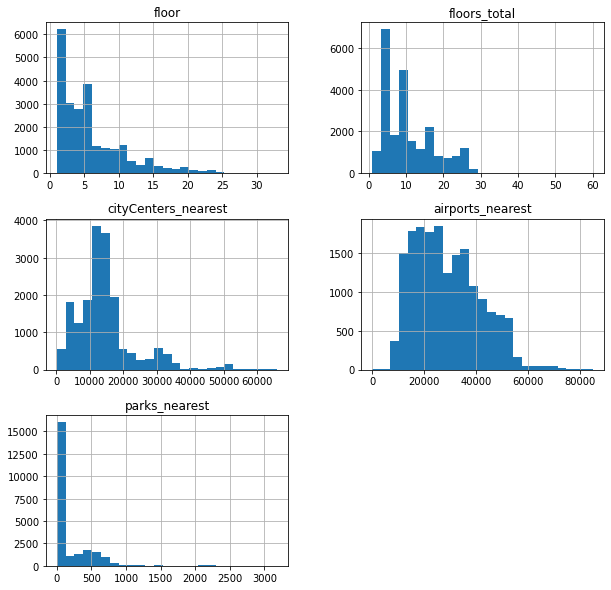

In [53]:
buiding_columns = [
    'floor', 'floor_type', 'floors_total',
    'cityCenters_nearest', 'airports_nearest', 'parks_nearest'
]
data[buiding_columns].hist(figsize=(10, 10), bins=25);

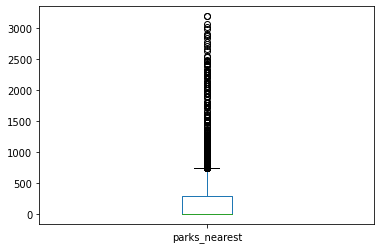

In [54]:
data['parks_nearest'].plot(kind='box');

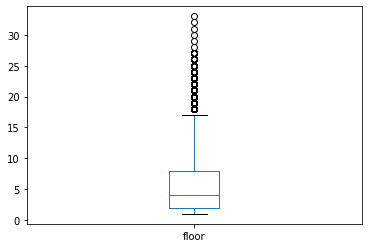

In [55]:
data['floor'].plot(kind='box');

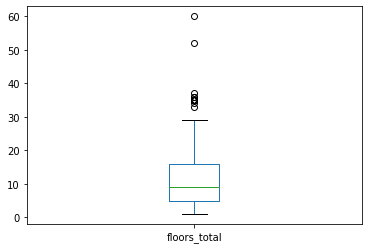

In [56]:
data['floors_total'].plot(kind='box');

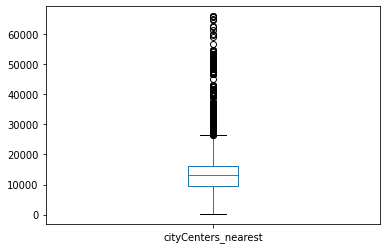

In [57]:
data['cityCenters_nearest'].plot(kind='box');

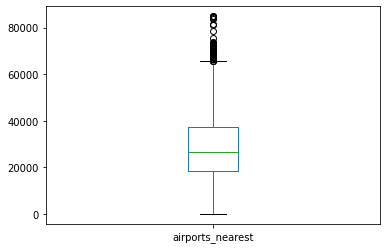

In [58]:
data['airports_nearest'].plot(kind='box');

In [59]:
data[buiding_columns].describe()

,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest
count,23365.000000,23365.000000,17945.000000,17858.000000,23365.000000
mean,5.882859,10.699551,14254.964837,28810.225557,166.324417
std,4.875414,6.597564,8599.838480,12663.613817,306.070735
min,1.000000,1.000000,181.000000,0.000000,0.000000
25%,2.000000,5.000000,9404.000000,18504.250000,0.000000
50%,4.000000,9.000000,13123.000000,26786.000000,0.000000
75%,8.000000,16.000000,16293.000000,37319.750000,296.000000
max,33.000000,60.000000,65968.000000,84869.000000,3190.000000


- Много объявлений с недвижимостью без парков в радиусе 3000м - возможно, людям это не так важно?;
- Большая часть продаж в домах, где 9 и меньше этажей (квартиры на меньших этажах соответственно), здания с 16+ этажами редкие;
- В большей части недвижимости есть центр города в ~10.000 м (ближайшие аэропорты связаны с центрами городов).

---


**Количество объявлений : время закрытия сделки**

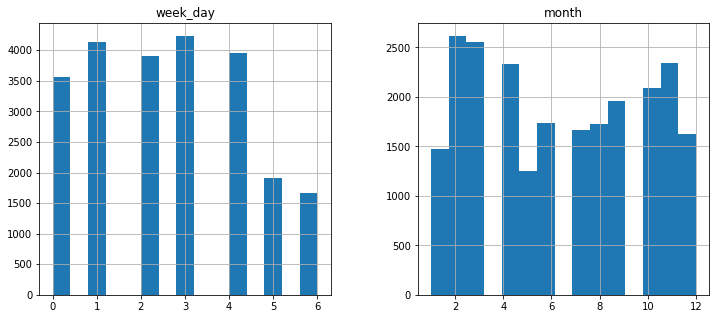

In [60]:
time_columns = [
    'week_day', 'month'
]
data[time_columns].hist(figsize=(12, 5), bins=15);

In [61]:
data[time_columns].describe()

,week_day,month
count,23365.000000,23365.000000
mean,2.567088,6.402183
std,1.788248,3.492439
min,0.000000,1.000000
25%,1.000000,3.000000
50%,3.000000,6.000000
75%,4.000000,10.000000
max,6.000000,12.000000


- Больше всего сделок совершалось в будние дни, больше всего в четверг, меньше всего - в воскресенье;
- Недвижимость несколько чаще покупали в Феврале и Марте, реже всего в Мае.

---

#### Изучить, как быстро продавались квартиры (столбец days_exposition)

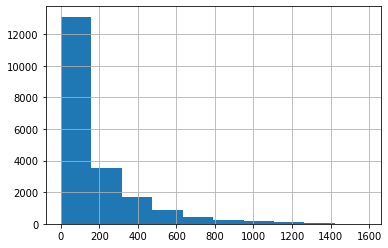

In [62]:
data['days_exposition'].hist();

In [63]:
# Среднее
data['days_exposition'].mean()

180.1148067608975

In [64]:
# Медиана
data['days_exposition'].median()

95.0

---

**Большая часть продавцов совершили сделку за менее, чем полгода  
Среднее арифметическое искажено частью сверхдолгих продаж (1400 дней)**  

Быстрой можно назвать любую продажу меньше медианного значения (меньше 100 дней), 
долгой - больше 1000 дней

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

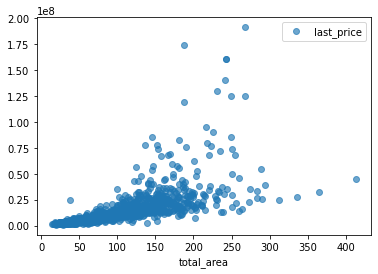

In [65]:
# total_area
total_area_pivot = pd.pivot_table(data, index=['total_area'], values='last_price')
total_area_pivot.plot(style='o', alpha=0.65);

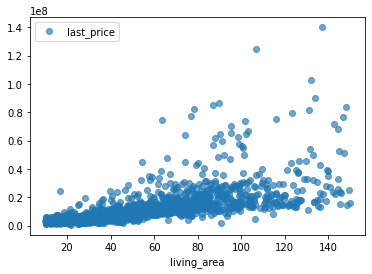

In [66]:
# living_area
living_area_pivot = pd.pivot_table(data, index=['living_area'], values='last_price')
living_area_pivot.plot(style='o', alpha=0.65);

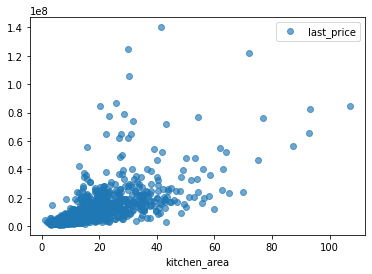

In [67]:
# kitchen_area
kitchen_area_pivot = pd.pivot_table(data, index=['kitchen_area'], values='last_price')
kitchen_area_pivot.plot(style='o', alpha=0.65);

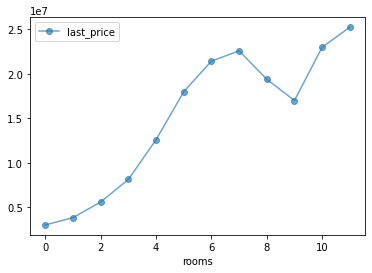

In [68]:
# rooms
rooms_pivot = pd.pivot_table(data, index=['rooms'], values='last_price')
rooms_pivot.plot(style='o-', alpha=0.65);

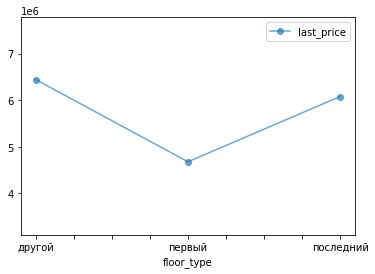

In [69]:
# floor_type
floor_type_pivot = pd.pivot_table(data, index=['floor_type'], values='last_price')
floor_type_pivot.plot(style='o-', alpha=0.65, ylim=[3.109031e+06, 7.777966e+06]);

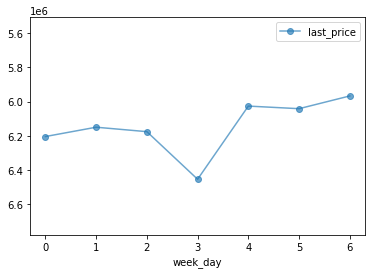

In [70]:
# даты размещения (день недели, месяц, год)
# week_day (цифрами)
week_pivot = pd.pivot_table(data, index=['week_day'], values='last_price')
week_pivot.plot(style='o-', alpha=0.65, ylim=[6.777966e+06, 5.509031e+06]);

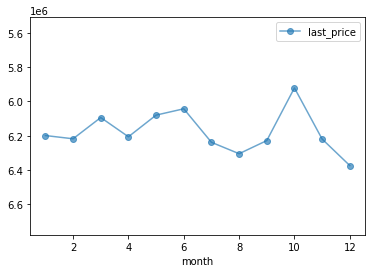

In [71]:
# month (цифрами)
month_pivot = pd.pivot_table(data, index=['month'], values='last_price')
month_pivot.plot(style='o-', alpha=0.65, ylim=[6.777966e+06, 5.509031e+06]);

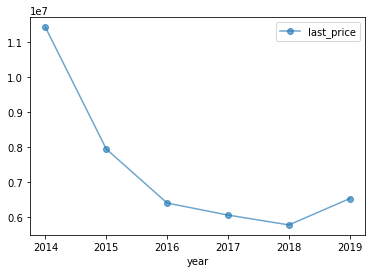

In [72]:
# year
year_pivot = pd.pivot_table(data, index=['year'], values='last_price')
year_pivot.plot(style='o-', alpha=0.65);

---

**Влияние на цену:**
- Площадь помещения (total, living, kitchen): чем больше - тем дороже
- Количество комнат: до семи комнат цена стабильно растёт, после, скорее всего, уже идут специфические помещения
- Этаж: чуть дешевле стоят помещения на первом этаже
- Месяц и день: влияние незначительно
- Год: Недвижимость дешевела с 2014 по 2018, сейчас опять растёт в цене

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
     Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
     Эти данные можно найти по имени в столбце locality_name.

In [73]:
# 10 населённых пунктов с наибольшим чилом объявлений
data.groupby('locality_name_drop')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name_drop
Санкт-Петербург    15473
Мурино               582
Кудрово              469
Шушары               438
Всеволожск           398
Пушкин               366
Колпино              337
Парголово            327
Гатчина              307
Выборг               236
Name: locality_name, dtype: int64

In [74]:
# Посчитать цену за метры
cities = ['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'Парголово', 'Гатчина', 'Выборг']
data_city_price = data.query('locality_name_drop == @cities')
data_city_pivot = pd.pivot_table(data_city_price, index=['locality_name_drop'], values=['last_price', 'total_area'])
data_city_pivot['meter_price'] = data_city_pivot['last_price'] / data_city_pivot['total_area']
data_city_pivot.sort_values(by='meter_price', ascending=False)

,last_price,total_area,meter_price
locality_name_drop,,,
Санкт-Петербург,7.534856e+06,62.717476,120139.661279
Пушкин,6.301159e+06,59.895847,105201.938155
Кудрово,4.355439e+06,46.398571,93870.103897
Парголово,4.488075e+06,51.521407,87110.874551
Мурино,3.683682e+06,44.238814,83268.090755
Шушары,4.109603e+06,53.867489,76290.965951
Колпино,3.866289e+06,52.358279,73842.926901
Гатчина,3.488337e+06,50.942932,68475.381534
Всеволожск,3.789068e+06,56.022186,67635.128626


---

**Самые дорогие метры в Питере, самые дешёвые в Выборге**

#### Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. 
    Опишите, как стоимость объектов зависит от расстояния до центра города.

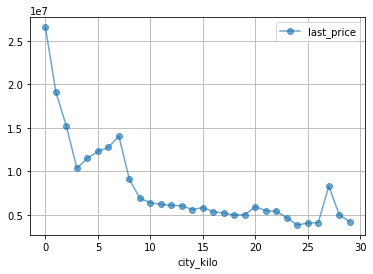

In [75]:
# Сводная таблица для зависимости цены м² от км до центра города и график
spb_pivot = pd.pivot_table(data.query('locality_name == "Санкт-Петербург"'), \
                           index=['city_kilo'], \
                           values=['last_price'], aggfunc='mean')
spb_pivot.plot(style='o-', alpha=0.65, grid=True);

В целом, чем меньше расстояние до центра, тем выше стоимость жилья.   
Есть необычные всплески цены, которые могут быть связаны с наличием других важных для людей объектов (например, станций метро или чего-то такого)

---

**Стоимость м² увеличивается на 1351 единиц денег за каждый метр ближе к центру**

In [76]:
# Переменные для вывода
quantity_dep = ['week_day', 'month', 'total_area', 'floors_total']
price_dep = [total_area_pivot, kitchen_area_pivot, living_area_pivot]

### Общий вывод

**Цель исследования:** выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости  
**Входные данные:** данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах

---

Для более точного анализа была проведена работа по удалению пропусков, обработке аномальных значений, обработке дубликатов и категоризации данных:  
- Были заполнены пропуски в данных (где была возможна логичная замена)
- Исключена из исследования недвижимость аномально больших размеров
- Для более наглядных подсчетов добавлены дополнительные столбцы:
          
      цена за м : 'meter_price'
      день/месяц/год регистрации на бирже : 'week_day'/'month'/'year'
      категория для этажа : 'floor_type'
      расстояние до центра города в км : 'city_kilo'
      
- Удалены дубликаты названий населённых пунктов      
      

---

В ходе исследования были получены результаты по следующим критериям:

**Количество зарегистрированных продаж:**



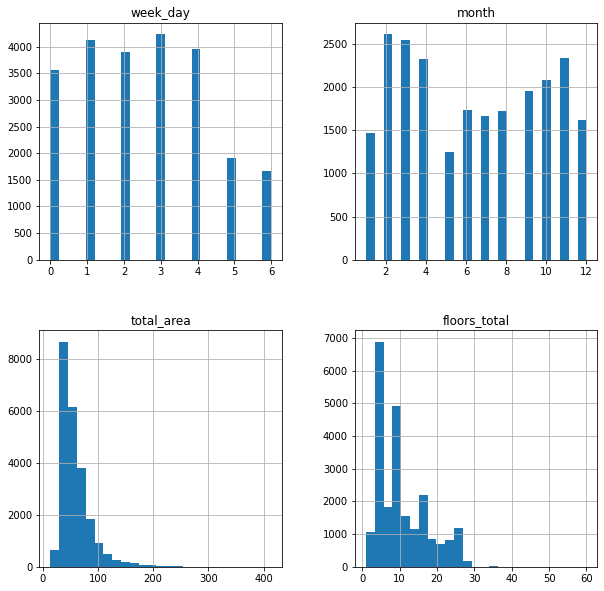

In [77]:
data[quantity_dep].hist(bins=25, figsize=(10,10));

- В будние дни продаж больше, в пятницу и субботу меньше;
- Зимой заявок на продажи больше, летом меньше;
- Самое большое количество продаж у недвижимости до 100м.

Населенный пункт с самым большим количеством объявлений о продаже: **Санкт-Петербург**

**Цена продажи недвижимости:**   

Её площадь:
- Общая (total_area)
- Кухня (kitchen_area)
- Жилые помещения (living_area)

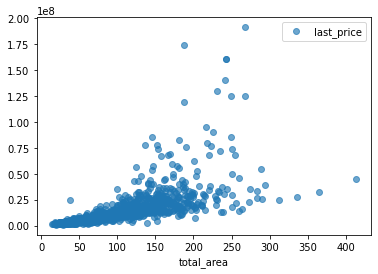

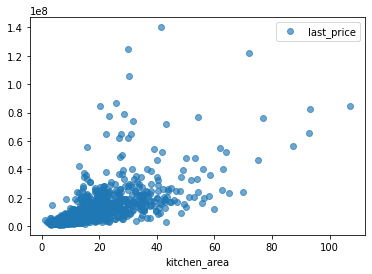

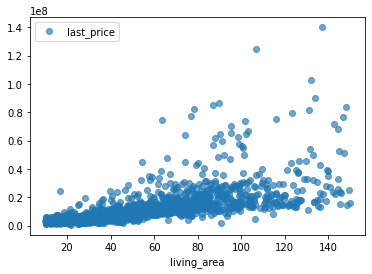

In [78]:
for area in price_dep:
    area.plot(style='o', alpha=0.65);

- Чем больше площадь помещения, тем выше его цена



Год продажи:

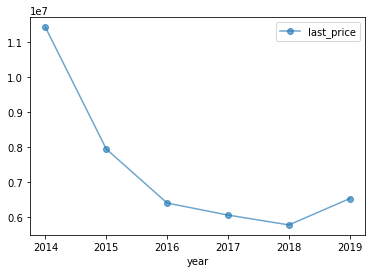

In [79]:
year_pivot.plot(style='o-', alpha=0.65);

- Цена на недвижимость падала до 2018
- С 2018 цена начала расти

---

**Зависимость цены недвижимости от расстояния до центра города (км) (на примере СПб):**

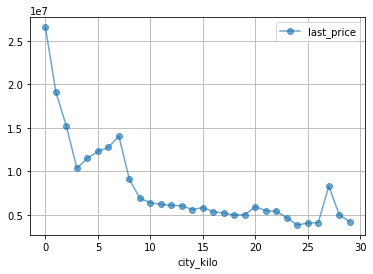

In [80]:
spb_pivot.plot(style='o-', alpha=0.65, grid=True);

- Чем ближе к центру, тем общая стоимость выше.
---
**Итоговый вывод:** Подводя итог исследованию зависимости количества продаж недвижимости от ее площади, этажа, цены за площадь и расстояния до центра города, мы можем сделать следующий вывод:

Площадь здания является важным фактором, влияющим на его цену и продажи. Большая площадь обычно означает более высокую цену и более низкие продажи, в то время как меньшая площадь обычно означает более низкую цену и более высокие продажи.
Этаж здания также может влиять на его цену и продажи.  

Эти данные можно в дальнейшем использовать для оценки нагрузки на персонал риелторов (по дням недели и месяцам), для предположительной оценки скорости продажи/поиска желаемой недвижимости для покупки, для предварительной оценки цен помещений.
